batch_01_vt/0021.jpg


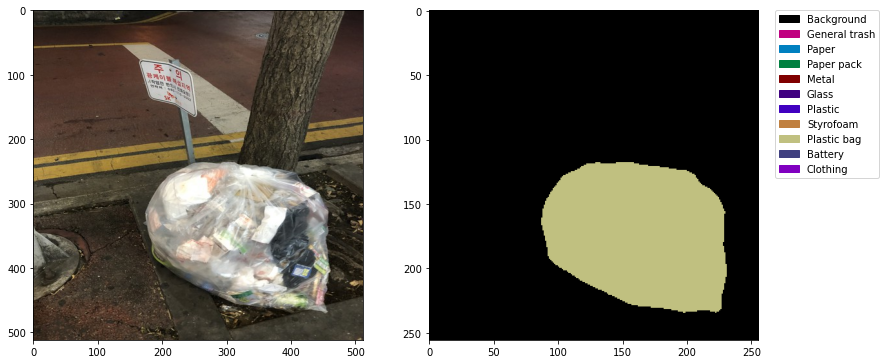

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.patches import Patch
import webcolors
import os

classes = ['Background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic','Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
palette = [
    [0, 0, 0],
    [192, 0, 128], [0, 128, 192], [0, 128, 64],
    [128, 0, 0], [64, 0, 128], [64, 0, 192],
    [192, 128, 64], [192, 192, 128], [64, 64, 128], [128, 0, 192]
]

img_dir = '../data' # 이미지 경로 (mmseg용이 아닌 원래 이미지 경로)
# inference한 csv 파일
csv_dir = '/opt/ml/input/code/mmsegmentation/hard_voted_output.csv'
result = pd.read_csv(csv_dir)

category_and_rgb = [[classes[i], palette[i]] for i in range(11)]
legend_elements = [Patch(facecolor=webcolors.rgb_to_hex(rgb), 
                         edgecolor=webcolors.rgb_to_hex(rgb), 
                         label=category) for category, rgb in category_and_rgb]

check_dir = './test_check' # 저장할 경로
os.makedirs(check_dir, exist_ok=True)

for idx in range(len(result['image_id'])):
    img_file = result['image_id'][idx]
    img_path = img_dir + '/' + img_file

    test_img = cv2.imread(img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB).astype(np.uint8)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 13))

    print(img_file)

    pred = np.array(result['PredictionString'][idx].split()).reshape(256, -1)
    img = np.zeros((256, 256, 3))
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            img[i][j][0] = palette[int(pred[i][j])][0]
            img[i][j][1] = palette[int(pred[i][j])][1]
            img[i][j][2] = palette[int(pred[i][j])][2]

    axes[0].imshow(test_img)
    axes[1].imshow(img.astype(np.uint8))
    axes[1].legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
    fig.savefig(check_dir + '/' + img_file.split('/')[0] + '_' + img_file.split('/')[1])
    break